# CE510: Modern Statistics for Engineers

## Winter 2026 Final Project

Completed by Brandon Auyeung for Dr. Peyman Abbaszadeh.

Let us define variables.

$ S \equiv \text{suspended sediment concentration, SSC} \ \dot{=} \ [\frac{M}{L^3}]$

$ Q \equiv \text{discharge} \ \dot{=} \ [L^3]$

$\alpha, \ \beta \equiv \text{model parameters} $

$\sigma \equiv \text{unknown measurement error}$

Note: 

S in Excel file is given in mg/L. Q in Excel is given in cfs. 

1 $\text{mg/L}$ = 0.001 $\text{kg/m}^3$. 1 $\text{cfs}$ = 0.0283168 $\text{m}^3\text{/s}$ 

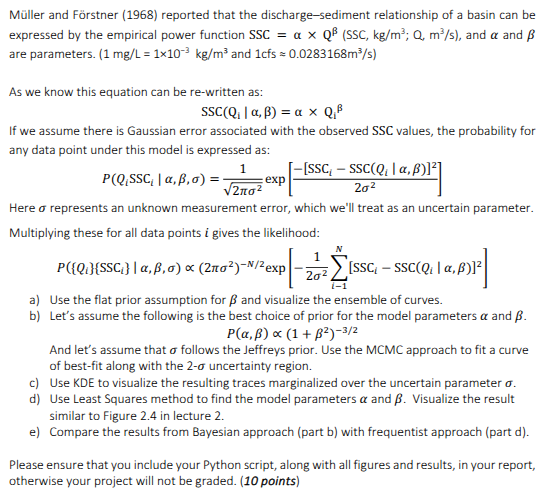

Import data

In [1]:
import numpy as np
import pandas as pd
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.optimize as opt

In [2]:
data = pd.read_excel("Data_Final_Project.xlsx", skiprows=0)
data = data.drop(["Agency","Station ID"], axis=1)
data

,Date,Suspended sediment concentration,Discharge
0,1961-10-01,4.0,327
1,1961-10-02,4.0,315
2,1961-10-03,4.0,309
3,1961-10-04,4.0,303
4,1961-10-05,4.0,294
...,...,...,...
3646,1971-09-25,1.0,444
3647,1971-09-26,2.0,485
3648,1971-09-27,4.0,554
3649,1971-09-28,4.0,623


## a) Use the flat prior assumption for $\beta$ and visualize the ensemble of curves.

$$ S(Q_i | \alpha, \ \beta) = \alpha Q_i^{\beta}$$

Assuming Gaussian error in $S_{obs}$:

$$ \mathbb{P}(Q_iS_i | \alpha, \beta, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}\left[ \frac{-[S_i - S(Q_i | \alpha, \beta)]^2}{2\sigma^2} \right]$$

$$ \mathcal{L} = \mathbb{P}(\vec{Q_i}\vec{S_i} | \alpha,  \beta,  \sigma) \propto (2\pi\sigma^2)^{-N/2}\text{exp}\left[ -\frac{1}{2\sigma^2} \sum_{i-1}^{N}[S_i - S(Q_i | \alpha, \beta)]^2\right]$$

In [5]:
beta_flat = stats.beta(1,1) # flat (uninformative)prior for beta